In [1]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

# Load the CSV file to examine the data structure
file_path = 'Nat_Gas.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand its format
data.head()


,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


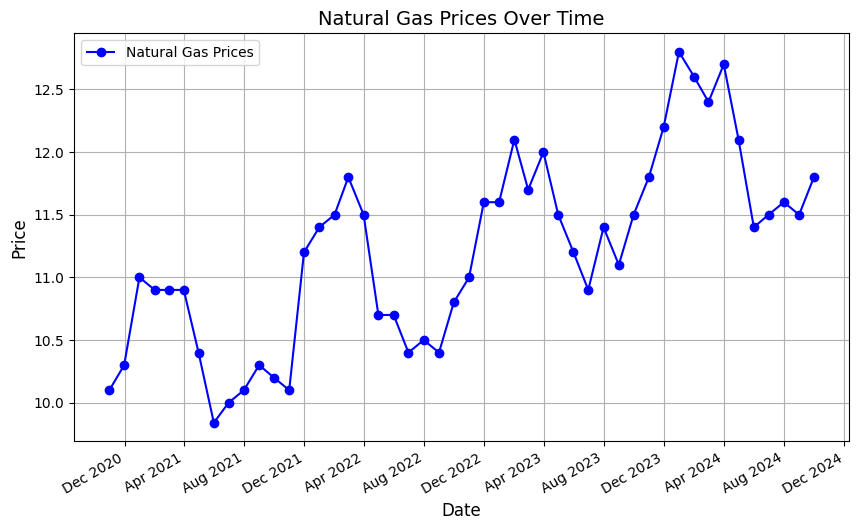

In [4]:
from pandas.plotting import register_matplotlib_converters
import matplotlib.dates as mdates

# Convert the Dates column to datetime format
data['Dates'] = pd.to_datetime(data['Dates'], format='%m/%d/%y')

# Set the Dates column as the index for easier time series analysis
data.set_index('Dates', inplace=True)

# Plot the historical price data to visualize trends
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Prices'], marker='o', linestyle='-', color='b', label='Natural Gas Prices')
plt.title('Natural Gas Prices Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(True)
plt.legend()

# Formatting the x-axis for better readability
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=4))
plt.gcf().autofmt_xdate()

plt.show()


**Price Estimation**

In [5]:
# Fit the model using Holt-Winters Exponential Smoothing to capture trends and seasonality
model = ExponentialSmoothing(data['Prices'], trend='add', seasonal='add', seasonal_periods=12).fit()

# Forecast the next 12 months (1 year)
forecast = model.forecast(12)

# Create a new dataframe for the forecasted data
forecast_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
forecast_df = pd.DataFrame({'Prices': forecast}, index=forecast_dates)

# Function to get the price estimate for a given date
def get_price_estimate(input_date):
    # Convert the input date to datetime
    input_date = pd.to_datetime(input_date)

    # Check if the input date is in the historical data
    if input_date in data.index:
        price = data.loc[input_date, 'Prices']
        return f"The price of natural gas on {input_date.strftime('%b %Y')} was ${price:.2f}"

    # Check if the input date is in the forecasted data
    elif input_date in forecast_df.index:
        price = forecast_df.loc[input_date, 'Prices']
        return f"The estimated price of natural gas on {input_date.strftime('%b %Y')} is ${price:.2f}"

    # If the date is out of range, return a message
    else:
        return "The date provided is out of the available range for estimation."



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
<ipython-input-5-2769a3128634>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')


In [6]:
# Example usage
print(get_price_estimate('2025-05-31'))  # Replace with any date you'd like

The estimated price of natural gas on May 2025 is $12.14
